# Ray Tune Basics

* https://docs.ray.io/en/latest/tune/index.html
* https://docs.ray.io/en/latest/tune/examples/tune_basic_example.html

* **NOTE:**
    * **This is search space based optimization such as that used for hyperparameter search problems.**
    * **This is not constratint based optimization.**

In [1]:
import random
import numpy as np
import pandas as pd
import ray
from ray import tune

## Minimize Objective 

### Step 1: Define Objective Function

In [2]:
def objective(x, intercept=4):
    """Find the MIN of this parabola"""
    return (x - intercept)**2 + random.random()

### Step 2: Visualize Objective Function (if possible)

<AxesSubplot:>

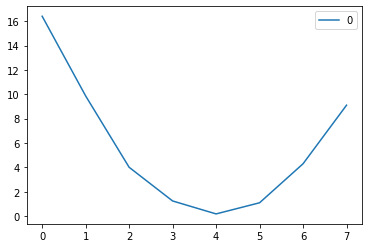

In [3]:
sweep = pd.DataFrame(np.array([objective(i) for i in np.arange(0, 8)]))
sweep.plot()

### Step 3: Optimize to find Maxima

In [4]:
def training_function(config):
    # Hyperparameters
    x = config["x"]
    # Iterative training function - can be any arbitrary training procedure.
    intermediate_score = objective(x)
    # Feed the score back back to Tune.
    tune.report(loss=intermediate_score)

In [5]:
help(tune.run)

Help on function run in module ray.tune.tune:

run(run_or_experiment: Union[str, Callable, Type], name: Union[str, NoneType] = None, metric: Union[str, NoneType] = None, mode: Union[str, NoneType] = None, stop: Union[NoneType, Mapping, ray.tune.stopper.Stopper, Callable[[str, Mapping], bool]] = None, time_budget_s: Union[NoneType, int, float, datetime.timedelta] = None, config: Union[Dict[str, Any], NoneType] = None, resources_per_trial: Union[NoneType, Mapping[str, Union[float, int, Mapping]], ray.tune.utils.placement_groups.PlacementGroupFactory] = None, num_samples: int = 1, local_dir: Union[str, NoneType] = None, search_alg: Union[ray.tune.suggest.suggestion.Searcher, ray.tune.suggest.search.SearchAlgorithm, str, NoneType] = None, scheduler: Union[ray.tune.schedulers.trial_scheduler.TrialScheduler, str, NoneType] = None, keep_checkpoints_num: Union[int, NoneType] = None, checkpoint_score_attr: Union[str, NoneType] = None, checkpoint_freq: int = 0, checkpoint_at_end: bool = False, v

In [6]:
analysis = tune.run(
    training_function,
    metric = "loss",
    mode = "min",
    name="minimize_experiment",
    config={
        "x": tune.uniform(0,8)        
    },
    num_samples=50 
)

2022-01-15 15:47:29,852	WARNING function_runner.py:561 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
2022-01-15 15:47:29,977	WARNING tune.py:570 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, set tune.run(resources_per_trial={'gpu': 1}...) which allows Tune to expose 1 GPU to each trial. You can also override `Trainable.default_resource_request` if using the Trainable API.


Trial name,status,loc,x
training_function_bccaa_00000,PENDING,,3.78503
training_function_bccaa_00001,PENDING,,7.09305
training_function_bccaa_00002,PENDING,,1.50558
training_function_bccaa_00003,PENDING,,1.53731
training_function_bccaa_00004,PENDING,,4.11704
training_function_bccaa_00005,PENDING,,4.82671
training_function_bccaa_00006,PENDING,,4.86301
training_function_bccaa_00007,PENDING,,5.82877
training_function_bccaa_00008,PENDING,,3.2627
training_function_bccaa_00009,PENDING,,5.12366


2022-01-15 15:47:30,531	ERROR syncer.py:111 -- Log sync requires rsync to be installed.


Result for training_function_bccaa_00002:
  date: 2022-01-15_15-47-33
  done: false
  experiment_id: dbe5cbfcfb4c48b683ae7face9070116
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 6.370862032575481
  node_ip: 127.0.0.1
  pid: 26584
  time_since_restore: 0.0029926300048828125
  time_this_iter_s: 0.0029926300048828125
  time_total_s: 0.0029926300048828125
  timestamp: 1642283253
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00002
  
Result for training_function_bccaa_00002:
  date: 2022-01-15_15-47-33
  done: true
  experiment_id: dbe5cbfcfb4c48b683ae7face9070116
  experiment_tag: 2_x=1.5056
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 6.370862032575481
  node_ip: 127.0.0.1
  pid: 26584
  time_since_restore: 0.0029926300048828125
  time_this_iter_s: 0.0029926300048828125
  time_total_s: 0.0029926300048828125
  timestamp: 1642283253
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00002
  
Result for training_function_b

Trial name,status,loc,x,iter,total time (s),loss
training_function_bccaa_00008,RUNNING,127.0.0.1:23620,3.2627,,,
training_function_bccaa_00009,RUNNING,127.0.0.1:2780,5.12366,,,
training_function_bccaa_00010,RUNNING,127.0.0.1:13392,0.511693,,,
training_function_bccaa_00011,RUNNING,127.0.0.1:30716,0.615081,,,
training_function_bccaa_00012,RUNNING,127.0.0.1:16312,1.09669,,,
training_function_bccaa_00013,RUNNING,127.0.0.1:30236,0.315195,,,
training_function_bccaa_00014,RUNNING,127.0.0.1:29860,4.73298,,,
training_function_bccaa_00016,PENDING,,5.36335,,,
training_function_bccaa_00017,PENDING,,7.61296,,,
training_function_bccaa_00018,PENDING,,0.981373,,,


Result for training_function_bccaa_00013:
  date: 2022-01-15_15-47-43
  done: false
  experiment_id: 32edd583c4354102a99d56419ff24426
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 14.21318090054808
  node_ip: 127.0.0.1
  pid: 30236
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283263
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00013
  


Trial name,status,loc,x,iter,total time (s),loss
training_function_bccaa_00008,RUNNING,127.0.0.1:23620,3.2627,,,
training_function_bccaa_00009,RUNNING,127.0.0.1:2780,5.12366,,,
training_function_bccaa_00010,RUNNING,127.0.0.1:13392,0.511693,,,
training_function_bccaa_00011,RUNNING,127.0.0.1:30716,0.615081,,,
training_function_bccaa_00012,RUNNING,127.0.0.1:16312,1.09669,,,
training_function_bccaa_00013,RUNNING,127.0.0.1:30236,0.315195,1,0,14.2132
training_function_bccaa_00014,RUNNING,127.0.0.1:29860,4.73298,,,
training_function_bccaa_00016,PENDING,,5.36335,,,
training_function_bccaa_00017,PENDING,,7.61296,,,
training_function_bccaa_00018,PENDING,,0.981373,,,


Result for training_function_bccaa_00010:
  date: 2022-01-15_15-47-43
  done: false
  experiment_id: 1bfa899183334dba871cf356af0ce81d
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 13.143667384748351
  node_ip: 127.0.0.1
  pid: 13392
  time_since_restore: 0.003988027572631836
  time_this_iter_s: 0.003988027572631836
  time_total_s: 0.003988027572631836
  timestamp: 1642283263
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00010
  
Result for training_function_bccaa_00012:
  date: 2022-01-15_15-47-43
  done: false
  experiment_id: 6c9c33617458484fba8da503469fac0f
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 8.444747043579019
  node_ip: 127.0.0.1
  pid: 16312
  time_since_restore: 0.0029916763305664062
  time_this_iter_s: 0.0029916763305664062
  time_total_s: 0.0029916763305664062
  timestamp: 1642283263
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00012
  
Result for training_function_bccaa_00010:
  date: 2022-01-15

Trial name,status,loc,x,iter,total time (s),loss
training_function_bccaa_00016,RUNNING,127.0.0.1:12880,5.36335,,,
training_function_bccaa_00017,RUNNING,127.0.0.1:27104,7.61296,,,
training_function_bccaa_00018,RUNNING,127.0.0.1:20120,0.981373,,,
training_function_bccaa_00019,RUNNING,127.0.0.1:8540,1.28703,,,
training_function_bccaa_00020,RUNNING,127.0.0.1:21484,2.22752,,,
training_function_bccaa_00021,RUNNING,127.0.0.1:22236,4.21574,,,
training_function_bccaa_00022,RUNNING,127.0.0.1:18088,7.51611,,,
training_function_bccaa_00024,PENDING,,1.32162,,,
training_function_bccaa_00025,PENDING,,0.753298,,,
training_function_bccaa_00026,PENDING,,7.49844,,,


Result for training_function_bccaa_00023:
  date: 2022-01-15_15-47-53
  done: false
  experiment_id: 826ffbc439e24b019f8753900feb88cb
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 6.061350142974893
  node_ip: 127.0.0.1
  pid: 16424
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283273
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00023
  
Result for training_function_bccaa_00021:
  date: 2022-01-15_15-47-53
  done: false
  experiment_id: 2fe342fe8c1a44ae8b5ae0ecbbf41b1b
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 0.8898984218310355
  node_ip: 127.0.0.1
  pid: 22236
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283273
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00021
  
Result for training_function_bccaa_00018:
  date: 2022-01-15_15-47-52
  done: false
  experiment_id: 9c309997fecc486aac40ec5830bd92c8
  hostname: Nikhil
  iterations

Trial name,status,loc,x,iter,total time (s),loss
training_function_bccaa_00024,RUNNING,127.0.0.1:24784,1.32162,,,
training_function_bccaa_00025,RUNNING,127.0.0.1:26144,0.753298,,,
training_function_bccaa_00026,RUNNING,127.0.0.1:26316,7.49844,,,
training_function_bccaa_00027,RUNNING,127.0.0.1:27744,4.84325,,,
training_function_bccaa_00028,RUNNING,127.0.0.1:23700,5.69157,,,
training_function_bccaa_00029,RUNNING,127.0.0.1:20368,5.31341,,,
training_function_bccaa_00030,RUNNING,127.0.0.1:29308,3.94451,,,
training_function_bccaa_00032,PENDING,,1.78613,,,
training_function_bccaa_00033,PENDING,,0.974767,,,
training_function_bccaa_00034,PENDING,,6.19616,,,


Result for training_function_bccaa_00028:
  date: 2022-01-15_15-48-02
  done: false
  experiment_id: 2f143f35a9254c55997e4a093f584443
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 3.6995465457088783
  node_ip: 127.0.0.1
  pid: 23700
  time_since_restore: 0.000997781753540039
  time_this_iter_s: 0.000997781753540039
  time_total_s: 0.000997781753540039
  timestamp: 1642283282
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00028
  


Trial name,status,loc,x,iter,total time (s),loss
training_function_bccaa_00024,RUNNING,127.0.0.1:24784,1.32162,,,
training_function_bccaa_00025,RUNNING,127.0.0.1:26144,0.753298,,,
training_function_bccaa_00026,RUNNING,127.0.0.1:26316,7.49844,,,
training_function_bccaa_00027,RUNNING,127.0.0.1:27744,4.84325,,,
training_function_bccaa_00028,RUNNING,127.0.0.1:23700,5.69157,1,0.000997782,3.69955
training_function_bccaa_00029,RUNNING,127.0.0.1:20368,5.31341,,,
training_function_bccaa_00030,RUNNING,127.0.0.1:29308,3.94451,,,
training_function_bccaa_00032,PENDING,,1.78613,,,
training_function_bccaa_00033,PENDING,,0.974767,,,
training_function_bccaa_00034,PENDING,,6.19616,,,


Result for training_function_bccaa_00030:
  date: 2022-01-15_15-48-02
  done: false
  experiment_id: c05725236dc7488fbb95d1492e2d976f
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 0.810495806182818
  node_ip: 127.0.0.1
  pid: 29308
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283282
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00030
  
Result for training_function_bccaa_00025:
  date: 2022-01-15_15-48-02
  done: false
  experiment_id: ae7760f3694740e0a97e7c0e58dd879c
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 11.462572300327569
  node_ip: 127.0.0.1
  pid: 26144
  time_since_restore: 0.0009963512420654297
  time_this_iter_s: 0.0009963512420654297
  time_total_s: 0.0009963512420654297
  timestamp: 1642283282
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00025
  
Result for training_function_bccaa_00025:
  date: 2022-01-15_15-48-02
  done: true
  experiment_id: ae7760f3694

Trial name,status,loc,x,iter,total time (s),loss
training_function_bccaa_00032,RUNNING,127.0.0.1:17700,1.78613,,,
training_function_bccaa_00033,RUNNING,127.0.0.1:28468,0.974767,,,
training_function_bccaa_00034,RUNNING,127.0.0.1:28176,6.19616,,,
training_function_bccaa_00035,RUNNING,127.0.0.1:5204,3.09097,,,
training_function_bccaa_00036,RUNNING,127.0.0.1:26508,5.67794,,,
training_function_bccaa_00037,RUNNING,127.0.0.1:18316,5.53938,,,
training_function_bccaa_00038,RUNNING,127.0.0.1:12484,4.62664,,,
training_function_bccaa_00040,PENDING,,2.76228,,,
training_function_bccaa_00041,PENDING,,7.93882,,,
training_function_bccaa_00042,PENDING,,2.46425,,,


Result for training_function_bccaa_00039:
  date: 2022-01-15_15-48-11
  done: false
  experiment_id: ce8fea6604744b36ab99f5c3daac6630
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 14.025529130112563
  node_ip: 127.0.0.1
  pid: 21980
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283291
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00039
  
Result for training_function_bccaa_00035:
  date: 2022-01-15_15-48-11
  done: false
  experiment_id: b8c877e305584204bb489971bab0d689
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 1.0566144226409064
  node_ip: 127.0.0.1
  pid: 5204
  time_since_restore: 0.0009987354278564453
  time_this_iter_s: 0.0009987354278564453
  time_total_s: 0.0009987354278564453
  timestamp: 1642283291
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00035
  
Result for training_function_bccaa_00036:
  date: 2022-01-15_15-48-11
  done: false
  experiment_id: 821c5a7746

Trial name,status,loc,x,iter,total time (s),loss
training_function_bccaa_00040,RUNNING,127.0.0.1:2776,2.76228,,,
training_function_bccaa_00041,RUNNING,127.0.0.1:1320,7.93882,,,
training_function_bccaa_00042,RUNNING,127.0.0.1:25992,2.46425,,,
training_function_bccaa_00043,RUNNING,127.0.0.1:2728,5.78154,,,
training_function_bccaa_00044,RUNNING,127.0.0.1:24872,5.92347,,,
training_function_bccaa_00045,RUNNING,127.0.0.1:22996,5.83911,,,
training_function_bccaa_00046,RUNNING,127.0.0.1:28560,2.04156,,,
training_function_bccaa_00047,RUNNING,127.0.0.1:26160,1.42118,,,
training_function_bccaa_00048,PENDING,,0.503798,,,
training_function_bccaa_00049,PENDING,,0.380349,,,


Result for training_function_bccaa_00042:
  date: 2022-01-15_15-48-21
  done: false
  experiment_id: 892de683003d459f922b68e4cd4f1fef
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 2.607638280723695
  node_ip: 127.0.0.1
  pid: 25992
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283301
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00042
  


Trial name,status,loc,x,iter,total time (s),loss
training_function_bccaa_00040,RUNNING,127.0.0.1:2776,2.76228,,,
training_function_bccaa_00041,RUNNING,127.0.0.1:1320,7.93882,,,
training_function_bccaa_00042,RUNNING,127.0.0.1:25992,2.46425,1,0,2.60764
training_function_bccaa_00043,RUNNING,127.0.0.1:2728,5.78154,,,
training_function_bccaa_00044,RUNNING,127.0.0.1:24872,5.92347,,,
training_function_bccaa_00045,RUNNING,127.0.0.1:22996,5.83911,,,
training_function_bccaa_00046,RUNNING,127.0.0.1:28560,2.04156,,,
training_function_bccaa_00047,RUNNING,127.0.0.1:26160,1.42118,,,
training_function_bccaa_00048,PENDING,,0.503798,,,
training_function_bccaa_00049,PENDING,,0.380349,,,


Result for training_function_bccaa_00045:
  date: 2022-01-15_15-48-21
  done: false
  experiment_id: f7f2ba4ae732425da31a733697d7f1f5
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 3.740933695364769
  node_ip: 127.0.0.1
  pid: 22996
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283301
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00045
  
Result for training_function_bccaa_00044:
  date: 2022-01-15_15-48-21
  done: false
  experiment_id: 0925eaa8afcf4e8588323ae8ada6d6a1
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 3.750907476152139
  node_ip: 127.0.0.1
  pid: 24872
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283301
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00044
  
Result for training_function_bccaa_00045:
  date: 2022-01-15_15-48-21
  done: true
  experiment_id: f7f2ba4ae732425da31a733697d7f1f5
  experiment_tag: 45_x=5.8391
  h

Trial name,status,loc,x,iter,total time (s),loss
training_function_bccaa_00048,RUNNING,127.0.0.1:19736,0.503798,,,
training_function_bccaa_00049,RUNNING,127.0.0.1:18008,0.380349,,,
training_function_bccaa_00000,TERMINATED,127.0.0.1:5860,3.78503,1,0.00598335,0.878187
training_function_bccaa_00001,TERMINATED,127.0.0.1:11352,7.09305,1,0.00897598,10.1674
training_function_bccaa_00002,TERMINATED,127.0.0.1:26584,1.50558,1,0.00299263,6.37086
training_function_bccaa_00003,TERMINATED,127.0.0.1:12876,1.53731,1,0.000997782,6.885
training_function_bccaa_00004,TERMINATED,127.0.0.1:27228,4.11704,1,0.00498652,0.993741
training_function_bccaa_00005,TERMINATED,127.0.0.1:28756,4.82671,1,0.00199556,1.42393
training_function_bccaa_00006,TERMINATED,127.0.0.1:15968,4.86301,1,0.00698113,1.30314
training_function_bccaa_00007,TERMINATED,127.0.0.1:5952,5.82877,1,0.0119677,3.43526


Result for training_function_bccaa_00048:
  date: 2022-01-15_15-48-28
  done: false
  experiment_id: ba839e2cc6c241b39ad1305718f28f3d
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 12.900223881694119
  node_ip: 127.0.0.1
  pid: 19736
  time_since_restore: 0.0009970664978027344
  time_this_iter_s: 0.0009970664978027344
  time_total_s: 0.0009970664978027344
  timestamp: 1642283308
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00048
  
Result for training_function_bccaa_00049:
  date: 2022-01-15_15-48-28
  done: false
  experiment_id: 0932aa6f886a4d9195d69dbde7635268
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 13.354327005862057
  node_ip: 127.0.0.1
  pid: 18008
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283308
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bccaa_00049
  
Result for training_function_bccaa_00048:
  date: 2022-01-15_15-48-28
  done: true
  experiment_id: ba839e2cc6

Trial name,status,loc,x,iter,total time (s),loss
training_function_bccaa_00000,TERMINATED,127.0.0.1:5860,3.78503,1,0.00598335,0.878187
training_function_bccaa_00001,TERMINATED,127.0.0.1:11352,7.09305,1,0.00897598,10.1674
training_function_bccaa_00002,TERMINATED,127.0.0.1:26584,1.50558,1,0.00299263,6.37086
training_function_bccaa_00003,TERMINATED,127.0.0.1:12876,1.53731,1,0.000997782,6.885
training_function_bccaa_00004,TERMINATED,127.0.0.1:27228,4.11704,1,0.00498652,0.993741
training_function_bccaa_00005,TERMINATED,127.0.0.1:28756,4.82671,1,0.00199556,1.42393
training_function_bccaa_00006,TERMINATED,127.0.0.1:15968,4.86301,1,0.00698113,1.30314
training_function_bccaa_00007,TERMINATED,127.0.0.1:5952,5.82877,1,0.0119677,3.43526
training_function_bccaa_00008,TERMINATED,127.0.0.1:23620,3.2627,1,0,1.50269
training_function_bccaa_00009,TERMINATED,127.0.0.1:2780,5.12366,1,0,1.86855


2022-01-15 15:48:28,535	INFO tune.py:626 -- Total run time: 58.69 seconds (58.39 seconds for the tuning loop).


### What do these messahes mean?

https://docs.ray.io/en/latest/tune/tutorials/tune-lifecycle.html#lifecycle-of-a-trial

### Step 4: Results

In [7]:
print("Best config: ", analysis.get_best_config(metric="loss", mode="min"))

Best config:  {'x': 3.939376160943227}


In [8]:
# Get a dataframe for analyzing trial results.
analysis.results_df

C:\Users\Nikhil\.conda\envs\ray-test\lib\site-packages\ray\tune\analysis\experiment_analysis.py:262: UserWarning: Dataframes will use '/' instead of '.' to delimit nested result keys in future versions of Ray. For forward compatibility, set the environment variable TUNE_RESULT_DELIM='/'
  warnings.warn(


,loss,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.x
trial_id,,,,,,,,,,,,,,,,,,
bccaa_00000,0.878187,0.005983,True,None,None,1,13bcf1cc1cbd4af3855e1fe6e9d68d8a,2022-01-15_15-47-33,1642283253,0.005983,5860,Nikhil,127.0.0.1,0.005983,0,1,0_x=3.785,3.785031
bccaa_00001,10.167436,0.008976,True,None,None,1,6d10a8cbbdc04ba98641397f6f7fb2eb,2022-01-15_15-47-33,1642283253,0.008976,11352,Nikhil,127.0.0.1,0.008976,0,1,1_x=7.0931,7.093055
bccaa_00002,6.370862,0.002993,True,None,None,1,dbe5cbfcfb4c48b683ae7face9070116,2022-01-15_15-47-33,1642283253,0.002993,26584,Nikhil,127.0.0.1,0.002993,0,1,2_x=1.5056,1.505583
bccaa_00003,6.884998,0.000998,True,None,None,1,d94aacb6932d469bb7192508b6b58de5,2022-01-15_15-47-33,1642283253,0.000998,12876,Nikhil,127.0.0.1,0.000998,0,1,3_x=1.5373,1.537305
bccaa_00004,0.993741,0.004987,True,None,None,1,d81274389289446ba7c348344733f3cc,2022-01-15_15-47-33,1642283253,0.004987,27228,Nikhil,127.0.0.1,0.004987,0,1,4_x=4.117,4.117040
bccaa_00005,1.423930,0.001996,True,None,None,1,229ab2a2bd37441ba13bcd34ad025060,2022-01-15_15-47-33,1642283253,0.001996,28756,Nikhil,127.0.0.1,0.001996,0,1,5_x=4.8267,4.826705
bccaa_00006,1.303138,0.006981,True,None,None,1,7767a5fb37e240c9b458776600b7c3bd,2022-01-15_15-47-33,1642283253,0.006981,15968,Nikhil,127.0.0.1,0.006981,0,1,6_x=4.863,4.863013
bccaa_00007,3.435263,0.011968,True,None,None,1,75359d6e0a7f4da88e902ed4ac48f885,2022-01-15_15-47-34,1642283254,0.011968,5952,Nikhil,127.0.0.1,0.011968,0,1,7_x=5.8288,5.828767
bccaa_00008,1.502688,0.000000,True,None,None,1,497bef8cd860477482e536f3a3379e11,2022-01-15_15-47-43,1642283263,0.000000,23620,Nikhil,127.0.0.1,0.000000,0,1,8_x=3.2627,3.262696


## Maximum Objective 

### Step 1: Define Objective Function

In [9]:
def objective(x, intercept=4):
    """Find the MAX of this parabola"""
    return 16 - (x - intercept)**2 + random.random()

### Step 2: Visualize Objective Function (if possible)

<AxesSubplot:>

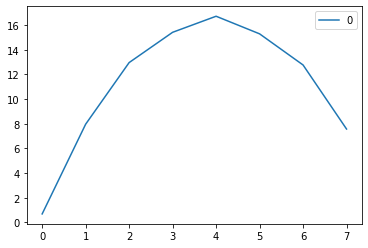

In [10]:
sweep = pd.DataFrame(np.array([objective(i) for i in np.arange(0, 8)]))
sweep.plot()

### Step 3: Optimize to find Maxima

In [11]:
def training_function(config):
    # Hyperparameters
    x = config["x"]
    # Iterative training function - can be any arbitrary training procedure.
    intermediate_score = objective(x)
    # Feed the score back back to Tune.
    tune.report(loss=intermediate_score)

In [12]:
analysis = tune.run(
    training_function,
    metric = "loss",
    mode = "max",
    name="maximize_experiment",
    config={
        "x": tune.uniform(0,8)        
    },
    num_samples=50 
)

2022-01-15 15:48:29,374	WARNING tune.py:570 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, set tune.run(resources_per_trial={'gpu': 1}...) which allows Tune to expose 1 GPU to each trial. You can also override `Trainable.default_resource_request` if using the Trainable API.


Trial name,status,loc,x
training_function_e0421_00000,PENDING,,3.38046
training_function_e0421_00001,PENDING,,2.00374
training_function_e0421_00002,PENDING,,2.31858
training_function_e0421_00003,PENDING,,0.293111
training_function_e0421_00004,PENDING,,4.15267
training_function_e0421_00005,PENDING,,7.51011
training_function_e0421_00006,PENDING,,5.54756
training_function_e0421_00007,PENDING,,5.65148
training_function_e0421_00008,PENDING,,7.21095
training_function_e0421_00009,PENDING,,3.07381


Trial name,status,loc,x
training_function_e0421_00000,PENDING,,3.38046
training_function_e0421_00001,PENDING,,2.00374
training_function_e0421_00002,PENDING,,2.31858
training_function_e0421_00003,PENDING,,0.293111
training_function_e0421_00004,PENDING,,4.15267
training_function_e0421_00005,PENDING,,7.51011
training_function_e0421_00006,PENDING,,5.54756
training_function_e0421_00007,PENDING,,5.65148
training_function_e0421_00008,PENDING,,7.21095
training_function_e0421_00009,PENDING,,3.07381


Result for training_function_e0421_00000:
  date: 2022-01-15_15-48-38
  done: false
  experiment_id: fa43b6a5b1e749c9a0015f9cd6a4610c
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 16.510697248095067
  node_ip: 127.0.0.1
  pid: 22128
  time_since_restore: 0.0019948482513427734
  time_this_iter_s: 0.0019948482513427734
  time_total_s: 0.0019948482513427734
  timestamp: 1642283318
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00000
  
Result for training_function_e0421_00000:
  date: 2022-01-15_15-48-38
  done: true
  experiment_id: fa43b6a5b1e749c9a0015f9cd6a4610c
  experiment_tag: 0_x=3.3805
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 16.510697248095067
  node_ip: 127.0.0.1
  pid: 22128
  time_since_restore: 0.0019948482513427734
  time_this_iter_s: 0.0019948482513427734
  time_total_s: 0.0019948482513427734
  timestamp: 1642283318
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00000
  
Result for training_function

Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00007,RUNNING,127.0.0.1:29652,5.65148,,,
training_function_e0421_00008,RUNNING,127.0.0.1:28104,7.21095,,,
training_function_e0421_00009,RUNNING,127.0.0.1:27512,3.07381,,,
training_function_e0421_00010,RUNNING,127.0.0.1:29512,4.50062,,,
training_function_e0421_00011,RUNNING,127.0.0.1:20608,5.38849,,,
training_function_e0421_00012,RUNNING,127.0.0.1:22448,2.63213,,,
training_function_e0421_00013,RUNNING,127.0.0.1:29896,2.79035,,,
training_function_e0421_00014,PENDING,,2.77118,,,
training_function_e0421_00015,PENDING,,3.9671,,,
training_function_e0421_00016,PENDING,,3.02681,,,


Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00007,RUNNING,127.0.0.1:29652,5.65148,,,
training_function_e0421_00008,RUNNING,127.0.0.1:28104,7.21095,,,
training_function_e0421_00009,RUNNING,127.0.0.1:27512,3.07381,,,
training_function_e0421_00010,RUNNING,127.0.0.1:29512,4.50062,,,
training_function_e0421_00011,RUNNING,127.0.0.1:20608,5.38849,,,
training_function_e0421_00012,RUNNING,127.0.0.1:22448,2.63213,,,
training_function_e0421_00013,RUNNING,127.0.0.1:29896,2.79035,,,
training_function_e0421_00015,PENDING,,3.9671,,,
training_function_e0421_00016,PENDING,,3.02681,,,
training_function_e0421_00017,PENDING,,5.73883,,,


Result for training_function_e0421_00012:
  date: 2022-01-15_15-48-47
  done: false
  experiment_id: e42b260c255d4b10ab5942640a418dc4
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 14.396950014786881
  node_ip: 127.0.0.1
  pid: 22448
  time_since_restore: 0.000997304916381836
  time_this_iter_s: 0.000997304916381836
  time_total_s: 0.000997304916381836
  timestamp: 1642283327
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00012
  
Result for training_function_e0421_00012:
  date: 2022-01-15_15-48-47
  done: true
  experiment_id: e42b260c255d4b10ab5942640a418dc4
  experiment_tag: 12_x=2.6321
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 14.396950014786881
  node_ip: 127.0.0.1
  pid: 22448
  time_since_restore: 0.000997304916381836
  time_this_iter_s: 0.000997304916381836
  time_total_s: 0.000997304916381836
  timestamp: 1642283327
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00012
  
Result for training_function_e042

Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00015,RUNNING,127.0.0.1:26708,3.9671,,,
training_function_e0421_00016,RUNNING,127.0.0.1:28524,3.02681,,,
training_function_e0421_00017,RUNNING,127.0.0.1:28596,5.73883,,,
training_function_e0421_00018,RUNNING,127.0.0.1:29648,4.19069,,,
training_function_e0421_00019,RUNNING,127.0.0.1:25484,4.15444,,,
training_function_e0421_00020,RUNNING,127.0.0.1:22076,2.19827,,,
training_function_e0421_00021,RUNNING,127.0.0.1:16608,4.25787,,,
training_function_e0421_00023,PENDING,,7.45443,,,
training_function_e0421_00024,PENDING,,4.12933,,,
training_function_e0421_00025,PENDING,,5.14232,,,


Result for training_function_e0421_00021:
  date: 2022-01-15_15-48-59
  done: false
  experiment_id: ba562e0ccb9c48e7b2b1542e7f59f223
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 16.068492773763143
  node_ip: 127.0.0.1
  pid: 16608
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283339
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00021
  


Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00015,RUNNING,127.0.0.1:26708,3.9671,,,
training_function_e0421_00016,RUNNING,127.0.0.1:28524,3.02681,,,
training_function_e0421_00017,RUNNING,127.0.0.1:28596,5.73883,,,
training_function_e0421_00018,RUNNING,127.0.0.1:29648,4.19069,,,
training_function_e0421_00019,RUNNING,127.0.0.1:25484,4.15444,,,
training_function_e0421_00020,RUNNING,127.0.0.1:22076,2.19827,,,
training_function_e0421_00021,RUNNING,127.0.0.1:16608,4.25787,1,0,16.0685
training_function_e0421_00023,PENDING,,7.45443,,,
training_function_e0421_00024,PENDING,,4.12933,,,
training_function_e0421_00025,PENDING,,5.14232,,,


Result for training_function_e0421_00022:
  date: 2022-01-15_15-48-58
  done: false
  experiment_id: c8ff30685b1a4699a13fc5ae6ac475dc
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 11.809990518635122
  node_ip: 127.0.0.1
  pid: 16884
  time_since_restore: 0.0009987354278564453
  time_this_iter_s: 0.0009987354278564453
  time_total_s: 0.0009987354278564453
  timestamp: 1642283338
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00022
  
Result for training_function_e0421_00021:
  date: 2022-01-15_15-48-59
  done: true
  experiment_id: ba562e0ccb9c48e7b2b1542e7f59f223
  experiment_tag: 21_x=4.2579
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 16.068492773763143
  node_ip: 127.0.0.1
  pid: 16608
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283339
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00021
  
Result for training_function_e0421_00022:
  date: 2022-01-15_15-48-58
  done: tru

Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00023,RUNNING,127.0.0.1:4508,7.45443,,,
training_function_e0421_00024,RUNNING,127.0.0.1:11468,4.12933,,,
training_function_e0421_00025,RUNNING,127.0.0.1:22112,5.14232,,,
training_function_e0421_00026,RUNNING,127.0.0.1:29536,3.13794,,,
training_function_e0421_00027,RUNNING,127.0.0.1:13072,7.60909,,,
training_function_e0421_00028,RUNNING,127.0.0.1:27252,7.32293,,,
training_function_e0421_00029,RUNNING,127.0.0.1:30268,2.14184,,,
training_function_e0421_00031,PENDING,,6.37253,,,
training_function_e0421_00032,PENDING,,0.0378527,,,
training_function_e0421_00033,PENDING,,1.13745,,,


Result for training_function_e0421_00024:
  date: 2022-01-15_15-49-08
  done: false
  experiment_id: 4f5876b246e44ed88b398e3075f78004
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 16.06803478217813
  node_ip: 127.0.0.1
  pid: 11468
  time_since_restore: 0.0009968280792236328
  time_this_iter_s: 0.0009968280792236328
  time_total_s: 0.0009968280792236328
  timestamp: 1642283348
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00024
  
Result for training_function_e0421_00024:
  date: 2022-01-15_15-49-08
  done: true
  experiment_id: 4f5876b246e44ed88b398e3075f78004
  experiment_tag: 24_x=4.1293
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 16.06803478217813
  node_ip: 127.0.0.1
  pid: 11468
  time_since_restore: 0.0009968280792236328
  time_this_iter_s: 0.0009968280792236328
  time_total_s: 0.0009968280792236328
  timestamp: 1642283348
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00024
  
Result for training_function_

Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00031,RUNNING,127.0.0.1:25444,6.37253,,,
training_function_e0421_00032,RUNNING,127.0.0.1:29660,0.0378527,,,
training_function_e0421_00033,RUNNING,127.0.0.1:25276,1.13745,,,
training_function_e0421_00034,RUNNING,127.0.0.1:24764,0.433631,,,
training_function_e0421_00035,RUNNING,127.0.0.1:25664,4.7773,,,
training_function_e0421_00036,RUNNING,127.0.0.1:21592,7.37678,,,
training_function_e0421_00037,RUNNING,127.0.0.1:29168,0.385098,,,
training_function_e0421_00039,PENDING,,0.315154,,,
training_function_e0421_00040,PENDING,,4.71413,,,
training_function_e0421_00041,PENDING,,6.05035,,,


Result for training_function_e0421_00036:
  date: 2022-01-15_15-49-17
  done: false
  experiment_id: 09c6f296780d4678b09324b371700624
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 4.752824977223137
  node_ip: 127.0.0.1
  pid: 21592
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283357
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00036
  


Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00031,RUNNING,127.0.0.1:25444,6.37253,,,
training_function_e0421_00032,RUNNING,127.0.0.1:29660,0.0378527,,,
training_function_e0421_00033,RUNNING,127.0.0.1:25276,1.13745,,,
training_function_e0421_00034,RUNNING,127.0.0.1:24764,0.433631,,,
training_function_e0421_00035,RUNNING,127.0.0.1:25664,4.7773,,,
training_function_e0421_00036,RUNNING,127.0.0.1:21592,7.37678,1,0,4.75282
training_function_e0421_00037,RUNNING,127.0.0.1:29168,0.385098,,,
training_function_e0421_00039,PENDING,,0.315154,,,
training_function_e0421_00040,PENDING,,4.71413,,,
training_function_e0421_00041,PENDING,,6.05035,,,


Result for training_function_e0421_00038:
  date: 2022-01-15_15-49-17
  done: false
  experiment_id: 088df1b9830c4436b0399a79767344da
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 8.66678083156209
  node_ip: 127.0.0.1
  pid: 7356
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283357
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00038
  
Result for training_function_e0421_00035:
  date: 2022-01-15_15-49-18
  done: false
  experiment_id: d56e558b3d2d43748a73c4a917fbc865
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 15.47362859948835
  node_ip: 127.0.0.1
  pid: 25664
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283358
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00035
  
Result for training_function_e0421_00035:
  date: 2022-01-15_15-49-18
  done: true
  experiment_id: d56e558b3d2d43748a73c4a917fbc865
  experiment_tag: 35_x=4.7773
  hos

Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00039,RUNNING,127.0.0.1:14332,0.315154,,,
training_function_e0421_00040,RUNNING,127.0.0.1:24652,4.71413,,,
training_function_e0421_00041,RUNNING,127.0.0.1:25084,6.05035,,,
training_function_e0421_00042,RUNNING,127.0.0.1:6760,3.38115,,,
training_function_e0421_00043,RUNNING,127.0.0.1:29836,2.42011,,,
training_function_e0421_00044,RUNNING,127.0.0.1:28404,0.143634,,,
training_function_e0421_00045,RUNNING,127.0.0.1:1372,3.99935,,,
training_function_e0421_00046,RUNNING,127.0.0.1:804,6.88284,,,
training_function_e0421_00047,PENDING,,6.64045,,,
training_function_e0421_00048,PENDING,,6.76818,,,


Result for training_function_e0421_00041:
  date: 2022-01-15_15-49-27
  done: false
  experiment_id: 35b4314f0d5f43e39a2e2179b01cc0f7
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 12.016947341845169
  node_ip: 127.0.0.1
  pid: 25084
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283367
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00041
  
Result for training_function_e0421_00039:
  date: 2022-01-15_15-49-27
  done: false
  experiment_id: 1020624639c045ac97e764cae05c65e0
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 3.2052945342414785
  node_ip: 127.0.0.1
  pid: 14332
  time_since_restore: 0.000997781753540039
  time_this_iter_s: 0.000997781753540039
  time_total_s: 0.000997781753540039
  timestamp: 1642283367
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00039
  
Result for training_function_e0421_00043:
  date: 2022-01-15_15-49-27
  done: false
  experiment_id: b7bd842864a4

Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00047,RUNNING,127.0.0.1:25008,6.64045,,,
training_function_e0421_00048,RUNNING,127.0.0.1:25124,6.76818,,,
training_function_e0421_00049,RUNNING,127.0.0.1:29456,6.72844,,,
training_function_e0421_00000,TERMINATED,127.0.0.1:22128,3.38046,1,0.00199485,16.5107
training_function_e0421_00001,TERMINATED,127.0.0.1:26176,2.00374,1,0.000997782,12.1026
training_function_e0421_00002,TERMINATED,127.0.0.1:30084,2.31858,1,0.00498581,13.9586
training_function_e0421_00003,TERMINATED,127.0.0.1:5176,0.293111,1,0.000993967,2.64699
training_function_e0421_00004,TERMINATED,127.0.0.1:7960,4.15267,1,0,16.9152
training_function_e0421_00005,TERMINATED,127.0.0.1:29604,7.51011,1,0.000995159,4.39769
training_function_e0421_00006,TERMINATED,127.0.0.1:29916,5.54756,1,0.00099659,14.4785


Result for training_function_e0421_00047:
  date: 2022-01-15_15-49-35
  done: false
  experiment_id: a12e6acde71d461d896c1606a2b86992
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 9.348626635492142
  node_ip: 127.0.0.1
  pid: 25008
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283375
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00047
  


Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00047,RUNNING,127.0.0.1:25008,6.64045,1,0,9.34863
training_function_e0421_00048,RUNNING,127.0.0.1:25124,6.76818,,,
training_function_e0421_00049,RUNNING,127.0.0.1:29456,6.72844,,,
training_function_e0421_00000,TERMINATED,127.0.0.1:22128,3.38046,1,0.00199485,16.5107
training_function_e0421_00001,TERMINATED,127.0.0.1:26176,2.00374,1,0.000997782,12.1026
training_function_e0421_00002,TERMINATED,127.0.0.1:30084,2.31858,1,0.00498581,13.9586
training_function_e0421_00003,TERMINATED,127.0.0.1:5176,0.293111,1,0.000993967,2.64699
training_function_e0421_00004,TERMINATED,127.0.0.1:7960,4.15267,1,0,16.9152
training_function_e0421_00005,TERMINATED,127.0.0.1:29604,7.51011,1,0.000995159,4.39769
training_function_e0421_00006,TERMINATED,127.0.0.1:29916,5.54756,1,0.00099659,14.4785


Result for training_function_e0421_00049:
  date: 2022-01-15_15-49-35
  done: false
  experiment_id: 60243ad1fdc64f36b1ca227e61ba49aa
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 9.155968215318062
  node_ip: 127.0.0.1
  pid: 29456
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283375
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00049
  
Result for training_function_e0421_00047:
  date: 2022-01-15_15-49-35
  done: true
  experiment_id: a12e6acde71d461d896c1606a2b86992
  experiment_tag: 47_x=6.6404
  hostname: Nikhil
  iterations_since_restore: 1
  loss: 9.348626635492142
  node_ip: 127.0.0.1
  pid: 25008
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1642283375
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: e0421_00047
  
Result for training_function_e0421_00049:
  date: 2022-01-15_15-49-35
  done: true
  experiment_id: 60243ad1fdc64f36b1ca227e61ba49aa
  ex

Trial name,status,loc,x,iter,total time (s),loss
training_function_e0421_00000,TERMINATED,127.0.0.1:22128,3.38046,1,0.00199485,16.5107
training_function_e0421_00001,TERMINATED,127.0.0.1:26176,2.00374,1,0.000997782,12.1026
training_function_e0421_00002,TERMINATED,127.0.0.1:30084,2.31858,1,0.00498581,13.9586
training_function_e0421_00003,TERMINATED,127.0.0.1:5176,0.293111,1,0.000993967,2.64699
training_function_e0421_00004,TERMINATED,127.0.0.1:7960,4.15267,1,0,16.9152
training_function_e0421_00005,TERMINATED,127.0.0.1:29604,7.51011,1,0.000995159,4.39769
training_function_e0421_00006,TERMINATED,127.0.0.1:29916,5.54756,1,0.00099659,14.4785
training_function_e0421_00007,TERMINATED,127.0.0.1:29652,5.65148,1,0.000958443,13.4109
training_function_e0421_00008,TERMINATED,127.0.0.1:28104,7.21095,1,0,6.35194
training_function_e0421_00009,TERMINATED,127.0.0.1:27512,3.07381,1,0.000998735,15.6954


2022-01-15 15:49:35,307	INFO tune.py:626 -- Total run time: 65.95 seconds (65.76 seconds for the tuning loop).


### Step 4: Results

In [13]:
print("Best config: ", analysis.get_best_config(metric="loss", mode="max"))

Best config:  {'x': 4.152669457754583}


In [14]:
# Get a dataframe for analyzing trial results.
analysis.results_df

,loss,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.x
trial_id,,,,,,,,,,,,,,,,,,
e0421_00000,16.510697,0.001995,True,None,None,1,fa43b6a5b1e749c9a0015f9cd6a4610c,2022-01-15_15-48-38,1642283318,0.001995,22128,Nikhil,127.0.0.1,0.001995,0,1,0_x=3.3805,3.380465
e0421_00001,12.102563,0.000998,True,None,None,1,1529b2d049c24a89bd7a5065e57873fc,2022-01-15_15-48-39,1642283319,0.000998,26176,Nikhil,127.0.0.1,0.000998,0,1,1_x=2.0037,2.003742
e0421_00002,13.958639,0.004986,True,None,None,1,edda7dbd4483463b89c31ee00ee1472b,2022-01-15_15-48-39,1642283319,0.004986,30084,Nikhil,127.0.0.1,0.004986,0,1,2_x=2.3186,2.318584
e0421_00003,2.646990,0.000994,True,None,None,1,126855ae07b941688f92dbd4b4d5409e,2022-01-15_15-48-39,1642283319,0.000994,5176,Nikhil,127.0.0.1,0.000994,0,1,3_x=0.29311,0.293111
e0421_00004,16.915217,0.000000,True,None,None,1,1f0cd7c440a44714a6dc1b0d37001e11,2022-01-15_15-48-39,1642283319,0.000000,7960,Nikhil,127.0.0.1,0.000000,0,1,4_x=4.1527,4.152669
e0421_00005,4.397694,0.000995,True,None,None,1,451d51b456ba4a27a056c69cb2084a71,2022-01-15_15-48-39,1642283319,0.000995,29604,Nikhil,127.0.0.1,0.000995,0,1,5_x=7.5101,7.510105
e0421_00006,14.478503,0.000997,True,None,None,1,dd5969edf9d04c3ba6318c56a1b7022c,2022-01-15_15-48-39,1642283319,0.000997,29916,Nikhil,127.0.0.1,0.000997,0,1,6_x=5.5476,5.547559
e0421_00007,13.410919,0.000958,True,None,None,1,014066d9aaa24983a6df5671411f8251,2022-01-15_15-48-41,1642283321,0.000958,29652,Nikhil,127.0.0.1,0.000958,0,1,7_x=5.6515,5.651484
e0421_00008,6.351942,0.000000,True,None,None,1,617703da651e432c9565af27c9ec61b2,2022-01-15_15-48-47,1642283327,0.000000,28104,Nikhil,127.0.0.1,0.000000,0,1,8_x=7.211,7.210952


## Shutdown

In [15]:
#####################################
#### Dont forget to shutdown ray ####
#####################################
ray.shutdown()
assert ray.is_initialized() is False